In [1]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
baf = pd.read_csv("baf.csv")

In [3]:
baf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
baf1 = baf.T.to_dict().values()

In [5]:
vec = DictVectorizer()

In [6]:
signal_array = vec.fit_transform(baf1).toarray()

In [7]:
feature_names = vec.get_feature_names()
##splits into numpy matrix

In [8]:
baff = pd.DataFrame(signal_array,columns=feature_names)

In [9]:
baff.head()

,age,campaign,cons.conf.idx,cons.price.idx,contact=cellular,contact=telephone,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,...,month=oct,month=sep,nr.employed,pdays,poutcome=failure,poutcome=nonexistent,poutcome=success,previous,y=no,y=yes
0,56.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
1,57.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
3,40.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0
4,56.0,1.0,-36.4,93.994,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,1.0,0.0


In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [11]:
X = signal_array[:,:-2]

In [12]:
X = np.hstack((X[:,:14],X[:,15:]))

In [13]:
y = signal_array[:,-1]

In [16]:
print("Using the forest modelling technique")
forest = RandomForestClassifier(n_estimators=250,random_state=0)

Using the forest modelling technique


In [17]:
forest.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [18]:
importances = forest.feature_importances_

In [19]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)

In [20]:
indices = np.argsort(importances)[::-1]

In [21]:
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature age (0.164047)
2. feature emp.var.rate (0.117021)
3. feature campaign (0.083560)
4. feature month=sep (0.049478)
5. feature nr.employed (0.034052)
6. feature cons.conf.idx (0.027570)
7. feature cons.price.idx (0.023012)
8. feature poutcome=nonexistent (0.022943)
9. feature education=unknown (0.022474)
10. feature euribor3m (0.021194)
11. feature housing=unknown (0.021185)
12. feature housing=yes (0.017653)
13. feature marital=divorced (0.016720)
14. feature education=basic.9y (0.016283)
15. feature education=professional.course (0.016191)
16. feature marital=married (0.014782)
17. feature day_of_week=mon (0.014618)
18. feature day_of_week=wed (0.014473)
19. feature poutcome=success (0.014427)
20. feature day_of_week=thu (0.014243)
21. feature day_of_week=tue (0.014166)
22. feature job=student (0.014008)
23. feature job=unknown (0.014003)
24. feature loan=unknown (0.013831)
25. feature day_of_week=fri (0.013753)
26. feature education=illiterate (0.011851)
27.

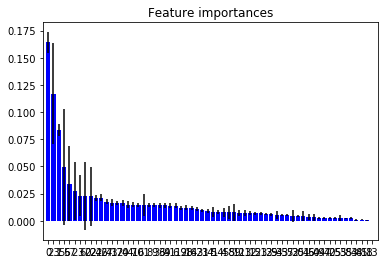

In [22]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


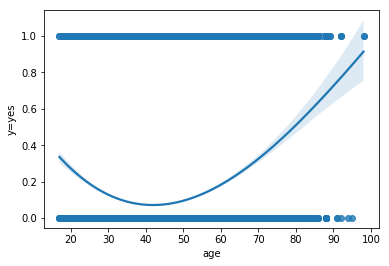

In [23]:
ax = sns.regplot(x="age", y="y=yes", order=3, data=baff, truncate=True)

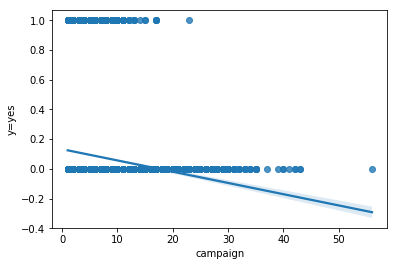

In [24]:
ax = sns.regplot(x="campaign", y="y=yes", order=1, data=baff, truncate=True)

In [25]:
baff.loc[(baff['campaign'] >15) & (baff['y=yes']==1)]

,age,campaign,cons.conf.idx,cons.price.idx,contact=cellular,contact=telephone,day_of_week=fri,day_of_week=mon,day_of_week=thu,day_of_week=tue,...,month=oct,month=sep,nr.employed,pdays,poutcome=failure,poutcome=nonexistent,poutcome=success,previous,y=no,y=yes
3219,39.0,23.0,-36.4,93.994,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,5191.0,999.0,0.0,1.0,0.0,0.0,0.0,1.0
10162,44.0,17.0,-41.8,94.465,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,5228.1,999.0,0.0,1.0,0.0,0.0,0.0,1.0
17284,59.0,17.0,-42.7,93.918,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,5228.1,999.0,0.0,1.0,0.0,0.0,0.0,1.0
17655,50.0,17.0,-42.7,93.918,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,5228.1,999.0,0.0,1.0,0.0,0.0,0.0,1.0
29980,31.0,17.0,-47.1,93.075,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,5099.1,999.0,0.0,1.0,0.0,0.0,0.0,1.0


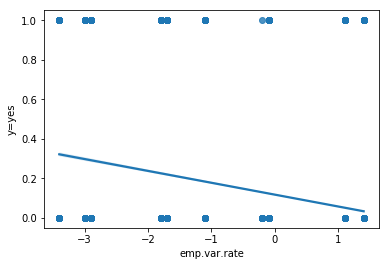

In [26]:
ax = sns.regplot(x="emp.var.rate", y="y=yes", order=1, data=baff, truncate=True)

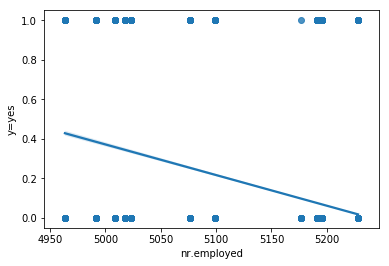

In [27]:
ax = sns.regplot(x="nr.employed", y="y=yes", order=1, data=baff, truncate=True)

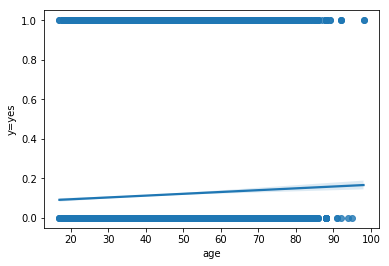

In [28]:
ax = sns.regplot(x="age", y="y=yes", order=1, data=baff, truncate=True)

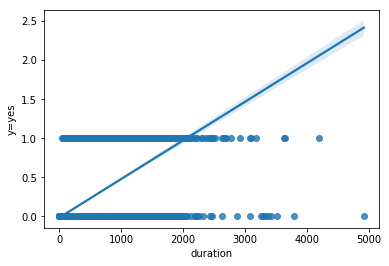

In [29]:
ax = sns.regplot(x="duration", y="y=yes", order=1, data=baff, truncate=True)

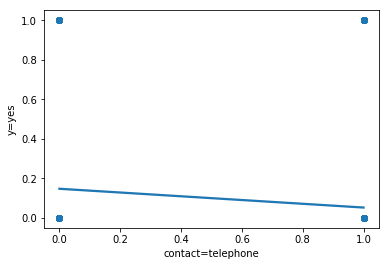

In [30]:
ax = sns.regplot(x="contact=telephone", y="y=yes", order=1, data=baff, truncate=True)

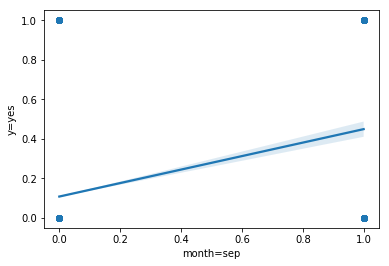

In [31]:
ax = sns.regplot(x="month=sep", y="y=yes", order=1, data=baff, truncate=True)

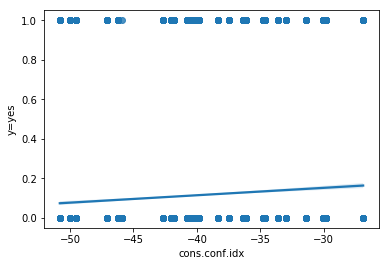

In [32]:
ax = sns.regplot(x="cons.conf.idx", y="y=yes", order=1, data=baff, truncate=True)

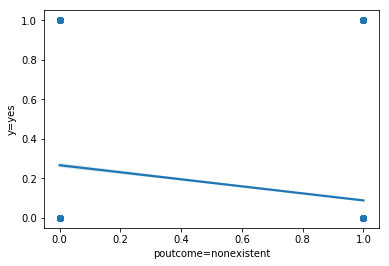

In [33]:
ax = sns.regplot(x="poutcome=nonexistent", y="y=yes", order=1, data=baff, truncate=True)

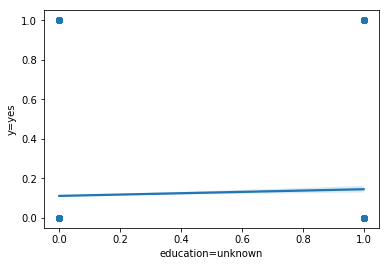

In [34]:
ax = sns.regplot(x="education=unknown", y="y=yes", order=1, data=baff, truncate=True)

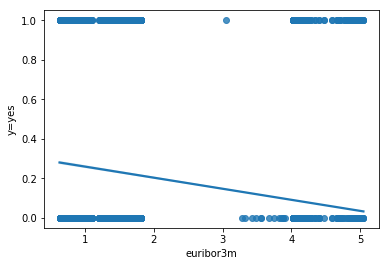

In [35]:
ax = sns.regplot(x="euribor3m", y="y=yes", order=1, data=baff, truncate=True)

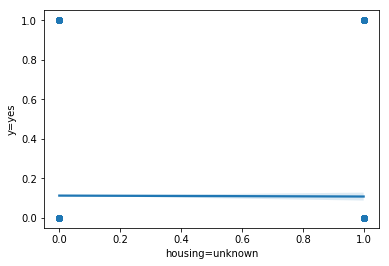

In [36]:
ax = sns.regplot(x="housing=unknown", y="y=yes", order=1, data=baff, truncate=True)

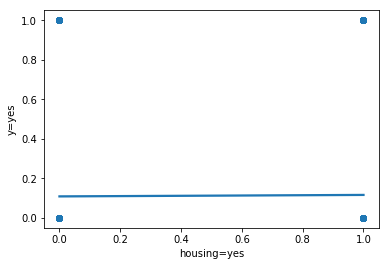

In [37]:
ax = sns.regplot(x="housing=yes", y="y=yes", order=1, data=baff, truncate=True)

In [38]:
print("Conversion ratio:")
sum(baff['y=yes'])/sum(baff['campaign'])

Conversion ratio:


0.043875408967982296

In [39]:
print("Efficiancy on every additional call:")
print ("Nth Call \t Efficiency")
for i in range(1,30):
    goo = sum(baff.loc[baff['campaign']==i]['y=yes']) / float(baff.loc[baff['campaign'] >= i].shape[0])
    print (str((i))+" \t\t "+str(goo))

Efficiancy on every additional call:
Nth Call 	 Efficiency
1 		 0.05584150723511702
2 		 0.05143124097511254
3 		 0.04423551171393342
4 		 0.03261296660117878
5 		 0.024077046548956663
6 		 0.022156573116691284
7 		 0.015793848711554447
8 		 0.009566685424873381
9 		 0.012345679012345678
10 		 0.010968921389396709
11 		 0.01380897583429229
12 		 0.004335260115606936
13 		 0.007054673721340388
14 		 0.002105263157894737
15 		 0.0049261083743842365
16 		 0.0
17 		 0.013157894736842105
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.008620689655172414
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [40]:
print(" We see that any call after the 6th call is not needed beacuse it has a conversion ratio of less than 1.6%")

 We see that any call after the 6th call is not needed beacuse it has a conversion ratio of less than 1.6%


In [41]:
print("For age upto 30")
print ("Nth Call \t Efficiency")
for i in range(1,30):
    num = float(baff[(baff['age'] <= 30) & (baff['campaign']==i) & (baff['y=yes']==1)].shape[0])
    den = 1+float(baff[(baff['age'] <= 30) & (baff['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))

For age upto 30
Nth Call 	 Efficiency
1 		 0.07502708559046588
2 		 0.07100309745055992
3 		 0.06274509803921569
4 		 0.04447739065974796
5 		 0.03882352941176471
6 		 0.02058319039451115
7 		 0.030805687203791468
8 		 0.006493506493506494
9 		 0.012875536480686695
10 		 0.005376344086021506
11 		 0.013888888888888888
12 		 0.0
13 		 0.010869565217391304
14 		 0.0
15 		 0.014705882352941176
16 		 0.0
17 		 0.0
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [42]:
print("For age between 30-40")
print ("Nth Call \t Efficiency")
for i in range(1,30):
    num = float(baff[(baff['age'] <= 40) & (baff['age'] > 30) & (baff['campaign']==i) & (baff['y=yes']==1)].shape[0])
    den = 1+float(baff[(baff['age'] <= 40) & (baff['age'] > 30) & (baff['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))

For age between 30-40
Nth Call 	 Efficiency
1 		 0.04882216526302942
2 		 0.042643923240938165
3 		 0.04005444293214078
4 		 0.028093645484949834
5 		 0.02048131080389145
6 		 0.024279210925644917
7 		 0.007494646680942184
8 		 0.008746355685131196
9 		 0.011538461538461539
10 		 0.011990407673860911
11 		 0.015015015015015015
12 		 0.0076045627376425855
13 		 0.009523809523809525
14 		 0.0
15 		 0.0
16 		 0.0
17 		 0.009259259259259259
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.02040816326530612
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [43]:
print("For age between 40-50")
print ("Nth Call \t Efficiency")
for i in range(1,30):
    num = float(baff[(baff['age'] <= 50) & (baff['age'] > 40) & (baff['campaign']==i) & (baff['y=yes']==1)].shape[0])
    den = 1+float(baff[(baff['age'] <= 50) & (baff['age'] > 40) & (baff['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))

For age between 40-50
Nth Call 	 Efficiency
1 		 0.03925397910360316
2 		 0.036345108695652176
3 		 0.03047676523838262
4 		 0.027820710973724884
5 		 0.020737327188940093
6 		 0.016853932584269662
7 		 0.008012820512820512
8 		 0.008368200836820083
9 		 0.005333333333333333
10 		 0.013888888888888888
11 		 0.017316017316017316
12 		 0.005434782608695652
13 		 0.006622516556291391
14 		 0.007936507936507936
15 		 0.0
16 		 0.0
17 		 0.023529411764705882
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [44]:
print("For age between 50-60")
print ( "Nth Call \t Efficiency")
for i in range(1,30):
    num = float(baff[(baff['age'] <= 60) & (baff['age'] > 50) & (baff['campaign']==i) & (baff['y=yes']==1)].shape[0])
    den = 1+float(baff[(baff['age'] <= 60) & (baff['age'] > 50) & (baff['campaign'] >= i)].shape[0])
    print (str((i))+" \t\t "+str(num/den))

For age between 50-60
Nth Call 	 Efficiency
1 		 0.050709615691277306
2 		 0.05120481927710843
3 		 0.040806293018682396
4 		 0.024681528662420384
5 		 0.016766467065868262
6 		 0.02120141342756184
7 		 0.022004889975550123
8 		 0.013559322033898305
9 		 0.024489795918367346
10 		 0.009900990099009901
11 		 0.0
12 		 0.0
13 		 0.0
14 		 0.0
15 		 0.011363636363636364
16 		 0.0
17 		 0.016129032258064516
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [45]:
print("For age above 60")
print ("Nth Call \t Efficiency")
for i in range(1,30):
    num = float(baff[(baff['age'] > 60) & (baff['campaign']==i) & (baff['y=yes']==1)].shape[0])
    den = float(baff[(baff['age'] > 60) & (baff['campaign'] >= i)].shape[0])+1
    print (str((i))+" \t\t "+str(num/den))

For age above 60
Nth Call 	 Efficiency
1 		 0.24807903402854006
2 		 0.25806451612903225
3 		 0.20512820512820512
4 		 0.19230769230769232
5 		 0.12244897959183673
6 		 0.12121212121212122
7 		 0.18181818181818182
8 		 0.06666666666666667
9 		 0.0
10 		 0.0
11 		 0.16666666666666666
12 		 0.0
13 		 0.0
14 		 0.0
15 		 0.0
16 		 0.0
17 		 0.0
18 		 0.0
19 		 0.0
20 		 0.0
21 		 0.0
22 		 0.0
23 		 0.0
24 		 0.0
25 		 0.0
26 		 0.0
27 		 0.0
28 		 0.0
29 		 0.0


In [46]:
total_calls = sum(baff['campaign'])
print(total_calls)

105754.0


In [47]:
extra_calls = sum(baff[baff['campaign']>6]['campaign']) - 6*baff[baff['campaign']>6].shape[0]
print(extra_calls)

12040.0


In [48]:
reduction=100*extra_calls/total_calls
print(reduction)

11.384912154622993


In [49]:
total_sales=float(baff[baff['y=yes']==1].shape[0])
print(total_sales)

4640.0


In [50]:
less_costly_sales=float(baff[(baff['campaign'] <= 6) & (baff['y=yes']==1)].shape[0])
print(less_costly_sales)

4529.0


In [51]:
sales_percent=100*less_costly_sales/total_sales
print(sales_percent)

97.60775862068965


In [52]:
print("CONCLUSION: A reduction of about 11.39% in marketing cost could be achieved while maintaining 97.6% sales if any person is called a max of 6 times.")

CONCLUSION: A reduction of about 11.39% in marketing cost could be achieved while maintaining 97.6% sales if any person is called a max of 6 times.
